In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# # 设置文件夹路径
# folder_path = 'all/test/'

# # 设置批次和张量的范围
# num_batches = 182  # 从0到181
# num_tensors = 15   # 从0到14

# # 初始化用于累加的字典
# tensor_sums = {i: None for i in range(num_tensors)}
# tensor_counts = {i: 0 for i in range(num_tensors)} 
# # 加载并累加每个张量的值
# for batch in range(num_batches):
#     print('batch:',batch)
#     for tensor in range(num_tensors):
#         file_name = f'{batch}_attribution_tensor_{tensor}.npy'
#         file_path = os.path.join(folder_path, file_name)
#         if os.path.exists(file_path):
#             tensor_data = np.load(file_path)
#             if tensor_sums[tensor] is None:
#                 tensor_sums[tensor] = np.zeros_like(tensor_data)
#             tensor_sums[tensor] += tensor_data
#             tensor_counts[tensor] += 1  # 更新计数
# # 确保所有张量都至少有一个有效的批次
# valid_tensors = [tensor for tensor, count in tensor_counts.items() if count > 0]

# ## 计算均值
# mean_tensors = [tensor_sums[tensor] / tensor_counts[tensor] for tensor in valid_tensors]
# # 检查张量 14 是否存在并计算均值
# if 14 in valid_tensors:
#     # 对于0到13的张量，计算所有样本的均值
#     mean_of_means_0_to_13 = [np.mean(tensor, axis=0) for tensor in mean_tensors if tensor.shape[-1] != 17]

#     # 对于张量14，分割并计算均值
#     mean_tensor_14 = [tensor for tensor in mean_tensors if tensor.shape[-1] == 17][0]
#     splits_mean_tensor_14 = [np.mean(mean_tensor_14[:, :, :, i], axis=0) for i in range(mean_tensor_14.shape[3])]

#     # 将所有结果保存为一个文件
#     all_means = mean_of_means_0_to_13 + splits_mean_tensor_14
# else:
#     # 只保存0到13的张量的均值
#     all_means = [np.mean(tensor, axis=0) for tensor in mean_tensors]

# # 保存结果
# all_means_file_path = os.path.join(folder_path, 'all_mean_tensors.npz')
# np.savez(all_means_file_path, *all_means)

# print(f"All mean tensors saved at: {all_means_file_path}")




In [46]:
import os
import numpy as np

# 定义计算去除异常值后的均值的函数
def calculate_filtered_mean(tensor_data):
    q1 = np.percentile(tensor_data, 25, axis=0)
    q3 = np.percentile(tensor_data, 75, axis=0)
    iqr = q3 - q1
    lower_bound = q1 - 20 * iqr
    upper_bound = q3 + 20 * iqr
    filtered_data = np.where((tensor_data > lower_bound) & (tensor_data < upper_bound), tensor_data, np.nan)
    return np.nanmean(filtered_data, axis=0)

# 设置文件夹路径和批次范围
folder_path = 'all/test/'
num_batches = 182  # 从0到181
num_tensors = 15   # 从0到14

# 初始化用于堆叠的列表
tensor_stacks = {i: [] for i in range(num_tensors)}

# 加载并堆叠每个张量的值
for batch in range(num_batches):
    for tensor in range(num_tensors):
        file_name = f'{batch}_attribution_tensor_{tensor}.npy'
        file_path = os.path.join(folder_path, file_name)
        if os.path.exists(file_path):
            tensor_data = np.load(file_path)
            tensor_stacks[tensor].append(tensor_data)

# 计算0到13的张量均值
means_0_to_13 = [calculate_filtered_mean(np.concatenate(tensor_stacks[tensor], axis=0)) for tensor in range(14)]

# 特殊处理张量14
if 14 in tensor_stacks:
    tensor_14_stacked = np.concatenate(tensor_stacks[14], axis=0)
    means_tensor_14 = []
    for i in range(tensor_14_stacked.shape[3]):
        split_tensor_14 = tensor_14_stacked[:, :, :, i]
        filtered_mean_split = calculate_filtered_mean(split_tensor_14)
        means_tensor_14.append(filtered_mean_split)

# 合并所有均值
all_means = np.array(means_0_to_13 + means_tensor_14)

# 保存结果
all_means_file_path = os.path.join(folder_path, 'all_mean_tensors_drop.npz')
np.savez(all_means_file_path, *all_means)

print(f"All filtered mean tensors saved at: {all_means_file_path}")


C:\Users\rky\AppData\Local\Temp\ipykernel_9560\2406526458.py:12: RuntimeWarning: Mean of empty slice
  return np.nanmean(filtered_data, axis=0)


All filtered mean tensors saved at: all/test/all_mean_tensors_drop.npz


C:\Users\rky\AppData\Local\Temp\ipykernel_9560\2406526458.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_means = np.array(means_0_to_13 + means_tensor_14)


In [23]:
# 横轴特征标签
feature_labels = [
    'IMF1 Hist', 'IMF2 Hist', 'IMF3 Hist', 'IMF4 Hist', 'IMF5 Hist', 'IMF6 Hist', 'IMF7 Hist', 'IMF8 Hist',
    'IMF9 Hist', 'IMF10 Hist', 'IMF11 Hist', 'IMF12 Hist', 'IMF13 Hist', 'PM2.5 Hist',
    '2m Temp', 'BL Height', 'K Index', 'Rel Humidity 950',
    'Surface Pressure', 'Total Precipitation', 'CO', 'NO2', 'O3', 'PM10', 
    'SO2', 'U Wind 975', 'V Wind 975', 'H Arr', 
    'W Arr', 'Speed', 'Direction'
]

# 纵轴城市标签
city_labels = [
    'Nanjing', 'Suzhou', 'Nantong', 'Lianyungang', 'Xuzhou', 'Yangzhou', 'Wuxi', 'Changzhou', 
    'Zhenjiang', 'Taizhou', 'Huaian', 'Yancheng', 'Suqian'
]

In [5]:
def draw_alltensor(data):
    # 重新调整画布以匹配张量的数量
    global_min = min([np.min(data[key]) for key in data])
    global_max = max([np.max(data[key]) for key in data])
    num_tensors = len(data.keys())
    num_rows = int(np.ceil(num_tensors / 4))
    fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    # 遍历所有键和张量并绘制
    for i, key in enumerate(data.keys()):
        tensor = data[key]
        # if tensor.ndim == 3:  # 如果张量是3维的，去掉最后一个维度
        #     tensor = tensor[:, :, 0]
        
        ax = axes[i]
        im = ax.imshow(tensor, cmap='viridis', vmin=global_min, vmax=global_max)
        # ax.set_title(f'Tensor {i}')
        ax.set_title(f' {feature_labels[i]}')
        fig.colorbar(im, ax=ax)

    # 调整布局并隐藏空白的子图
    for ax in axes[num_tensors:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



In [6]:
def cal_ct(data):
    # 对每个张量沿时间轴（第一个轴）求均值
    mean_over_time = [np.mean(tensor, axis=0) for tensor in data.values()]
    # 确保所有的时间均值张量至少是二维的
    mean_over_time_2d = [tensor if tensor.ndim == 2 else tensor[:, np.newaxis] for tensor in mean_over_time]

    # 将所有时间均值张量合并为一个大的张量
    combined_tensor = np.concatenate(mean_over_time_2d, axis=1)
    return combined_tensor

In [7]:
def draw_ct(combined_tensor):

   

    # 可视化合并后的张量
    plt.figure(figsize=(15, 10))
    im = plt.imshow(combined_tensor, cmap='viridis', aspect='auto')

    # 设置横轴和纵轴标签
    plt.xticks(ticks=np.arange(len(feature_labels)), labels=feature_labels, rotation=90)
    plt.yticks(ticks=np.arange(len(city_labels)), labels=city_labels)

    plt.title('Combined Mean Over Time - All Tensors')
    plt.colorbar(im)
    plt.show()



In [40]:
def cal_ctc(combined_tensor):
        
    # 对13个城市求均值，分析每个特征的重要性
    mean_across_cities = np.nanmean(combined_tensor, axis=0)
    return mean_across_cities

In [9]:
def draw_fea(mean_across_cities):
    # 设置 seaborn 的风格
    # sns.set_theme(style="whitegrid")
    max_abs_value = np.max(np.abs(mean_across_cities))

    # 创建一个横向的条形图来显示特征的平均重要性
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=mean_across_cities, y=feature_labels)

    # 设置标题和轴标签
    ax.set_xlim(-max_abs_value, max_abs_value)

    ax.set_title('Overall Mean Feature Importance (Scaled) of Each Feature')
    ax.set_xlabel('Overall Mean Feature Importance (Scaled by 10^-5)')
    ax.set_ylabel('Feature Name in Tensor 14')

    # 显示图形
    plt.show()




In [10]:
def draw_fea_sorted(mean_across_cities):
    # 计算绝对值的最大值以确保横轴和纵轴的绝对值一致
    max_abs_value = np.max(np.abs(mean_across_cities))

    # 将特征标签和它们对应的平均重要性值结合在一起，以便排序
    features_with_values = list(zip(feature_labels, mean_across_cities))
    
    # 按照特征重要性的绝对值大小进行排序
    features_with_values.sort(key=lambda x: x[1], reverse=True)

    # 分离排序后的特征标签和它们对应的值
    sorted_labels, sorted_values = zip(*features_with_values)

    # 创建一个横向的条形图来显示排序后的特征的平均重要性
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=np.array(sorted_values), y=np.array(sorted_labels))

    # 设置横轴的范围，使其与纵轴的范围绝对值一致
    ax.set_xlim(-max_abs_value, max_abs_value)

    # 设置标题和轴标签
    ax.set_title('Overall Mean Feature Importance (Scaled) of Each Feature')
    ax.set_xlabel('Overall Mean Feature Importance (Scaled by 10^-5)')
    ax.set_ylabel('Feature Name')

    # 显示图形
    plt.show()

In [71]:
# 加载保存的 .npz 文件
file_path_train = 'all/train/all_mean_tensors.npz'
data_train = np.load(file_path_train)
ct_train=cal_ct(data_train)
ctc_train=cal_ctc(ct_train)


file_path_test = 'all/test/all_mean_tensors.npz'
data_test = np.load(file_path_test)
ct_test=cal_ct(data_test)
ctc_test=cal_ctc(ct_test)


file_path_val = 'all/val/all_mean_tensors.npz'
data_val = np.load(file_path_val)
ct_val=cal_ct(data_val)
ctc_val=cal_ctc(ct_val)



In [47]:
file_path_test = 'all/test/all_mean_tensors_drop.npz'
data_test = np.load(file_path_test)
ct_test=cal_ct(data_test)
ctc_test=cal_ctc(ct_test)


Tensor 0: shape (8, 13, 1)
Tensor 1: shape (8, 13, 1)
Tensor 2: shape (8, 13, 1)
Tensor 3: shape (8, 13, 1)
Tensor 4: shape (8, 13, 1)
Tensor 5: shape (8, 13, 1)
Tensor 6: shape (8, 13, 1)
Tensor 7: shape (8, 13, 1)
Tensor 8: shape (8, 13, 1)
Tensor 9: shape (8, 13, 1)
Tensor 10: shape (8, 13, 1)
Tensor 11: shape (8, 13, 1)
Tensor 12: shape (8, 13, 1)
Tensor 13: shape (8, 13, 1)
Tensor 14: shape (9, 13)
Tensor 15: shape (9, 13)
Tensor 16: shape (9, 13)
Tensor 17: shape (9, 13)
Tensor 18: shape (9, 13)
Tensor 19: shape (9, 13)
Tensor 20: shape (9, 13)
Tensor 21: shape (9, 13)
Tensor 22: shape (9, 13)
Tensor 23: shape (9, 13)
Tensor 24: shape (9, 13)
Tensor 25: shape (9, 13)
Tensor 26: shape (9, 13)
Tensor 27: shape (9, 13)
Tensor 28: shape (9, 13)
Tensor 29: shape (9, 13)
Tensor 30: shape (9, 13)


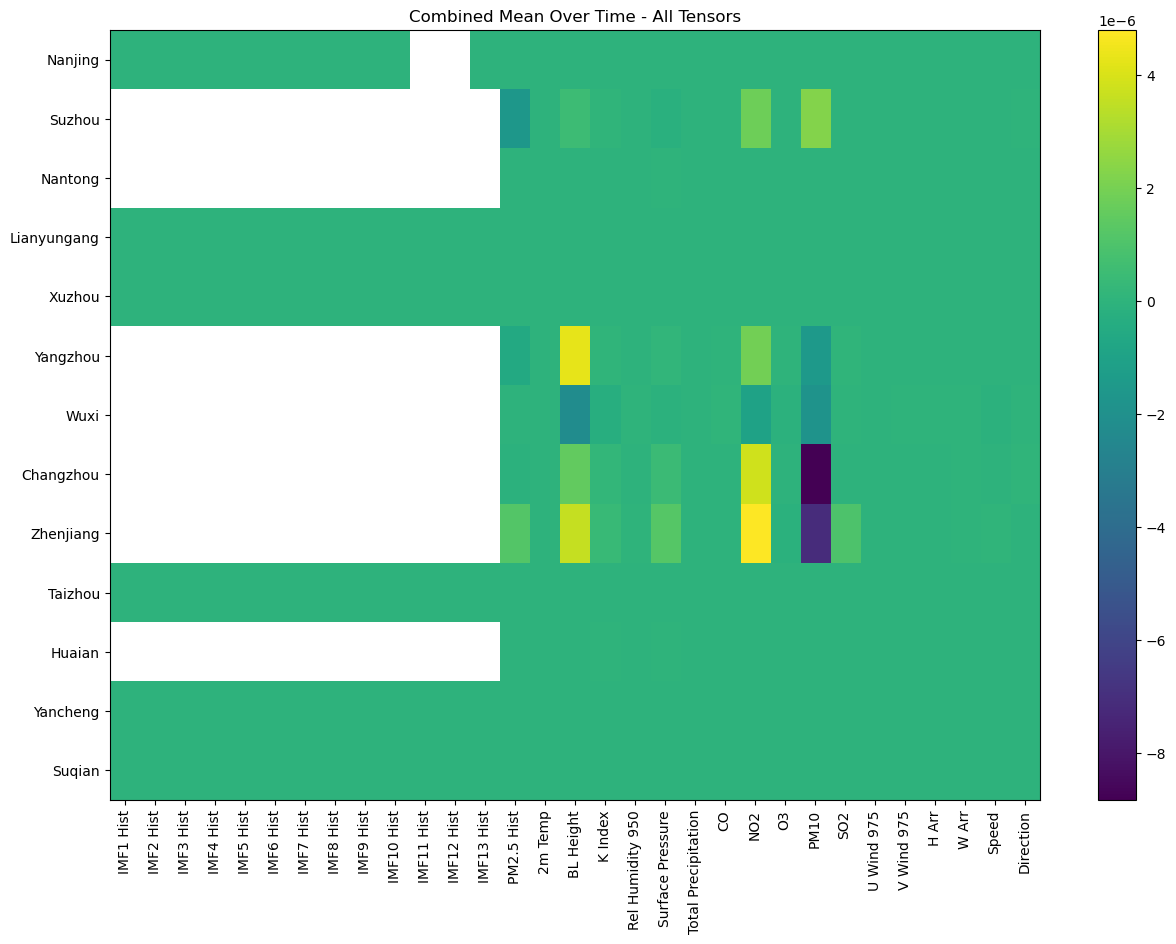

[-1.11031705e-10  7.12021761e-12 -3.85403619e-11 -4.09473601e-11
 -9.75547490e-11  2.71334188e-11 -3.53640693e-11 -4.95806902e-11
 -5.38201463e-11  1.04079800e-11 -8.16531079e-11  5.71718714e-11
  9.41092829e-11 -8.57163016e-08  4.30893266e-10  5.94120763e-07
  3.55429464e-08  2.22847962e-09  1.18578569e-07 -7.48833218e-11
  3.08295056e-09  8.74219381e-07 -1.95834833e-08 -1.30538342e-06
  8.38011545e-08 -8.55916449e-10 -3.50960128e-09 -3.92065047e-09
  1.23447130e-09 -7.43977102e-09  7.02681335e-09]


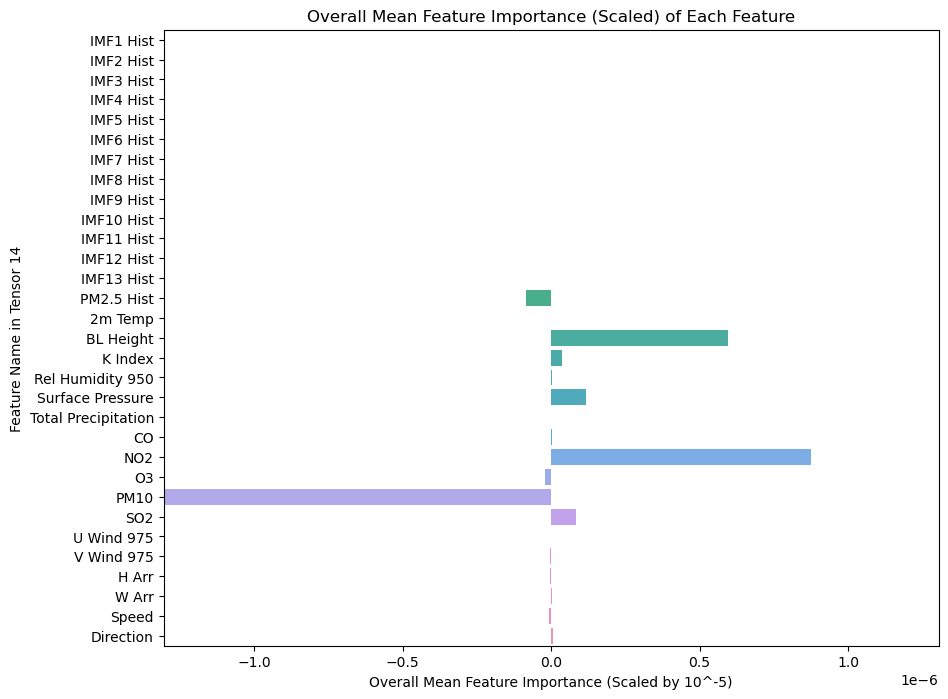

In [48]:
tensors = [data_test[key] for key in data_test]

# 检查形状
for i, tensor in enumerate(tensors):
    print(f"Tensor {i}: shape {tensor.shape}")
draw_ct(ct_test)
print(ctc_test)
draw_fea(ctc_test)

C:\Users\rky\AppData\Local\Temp\ipykernel_33660\3749451753.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, ax=ax)


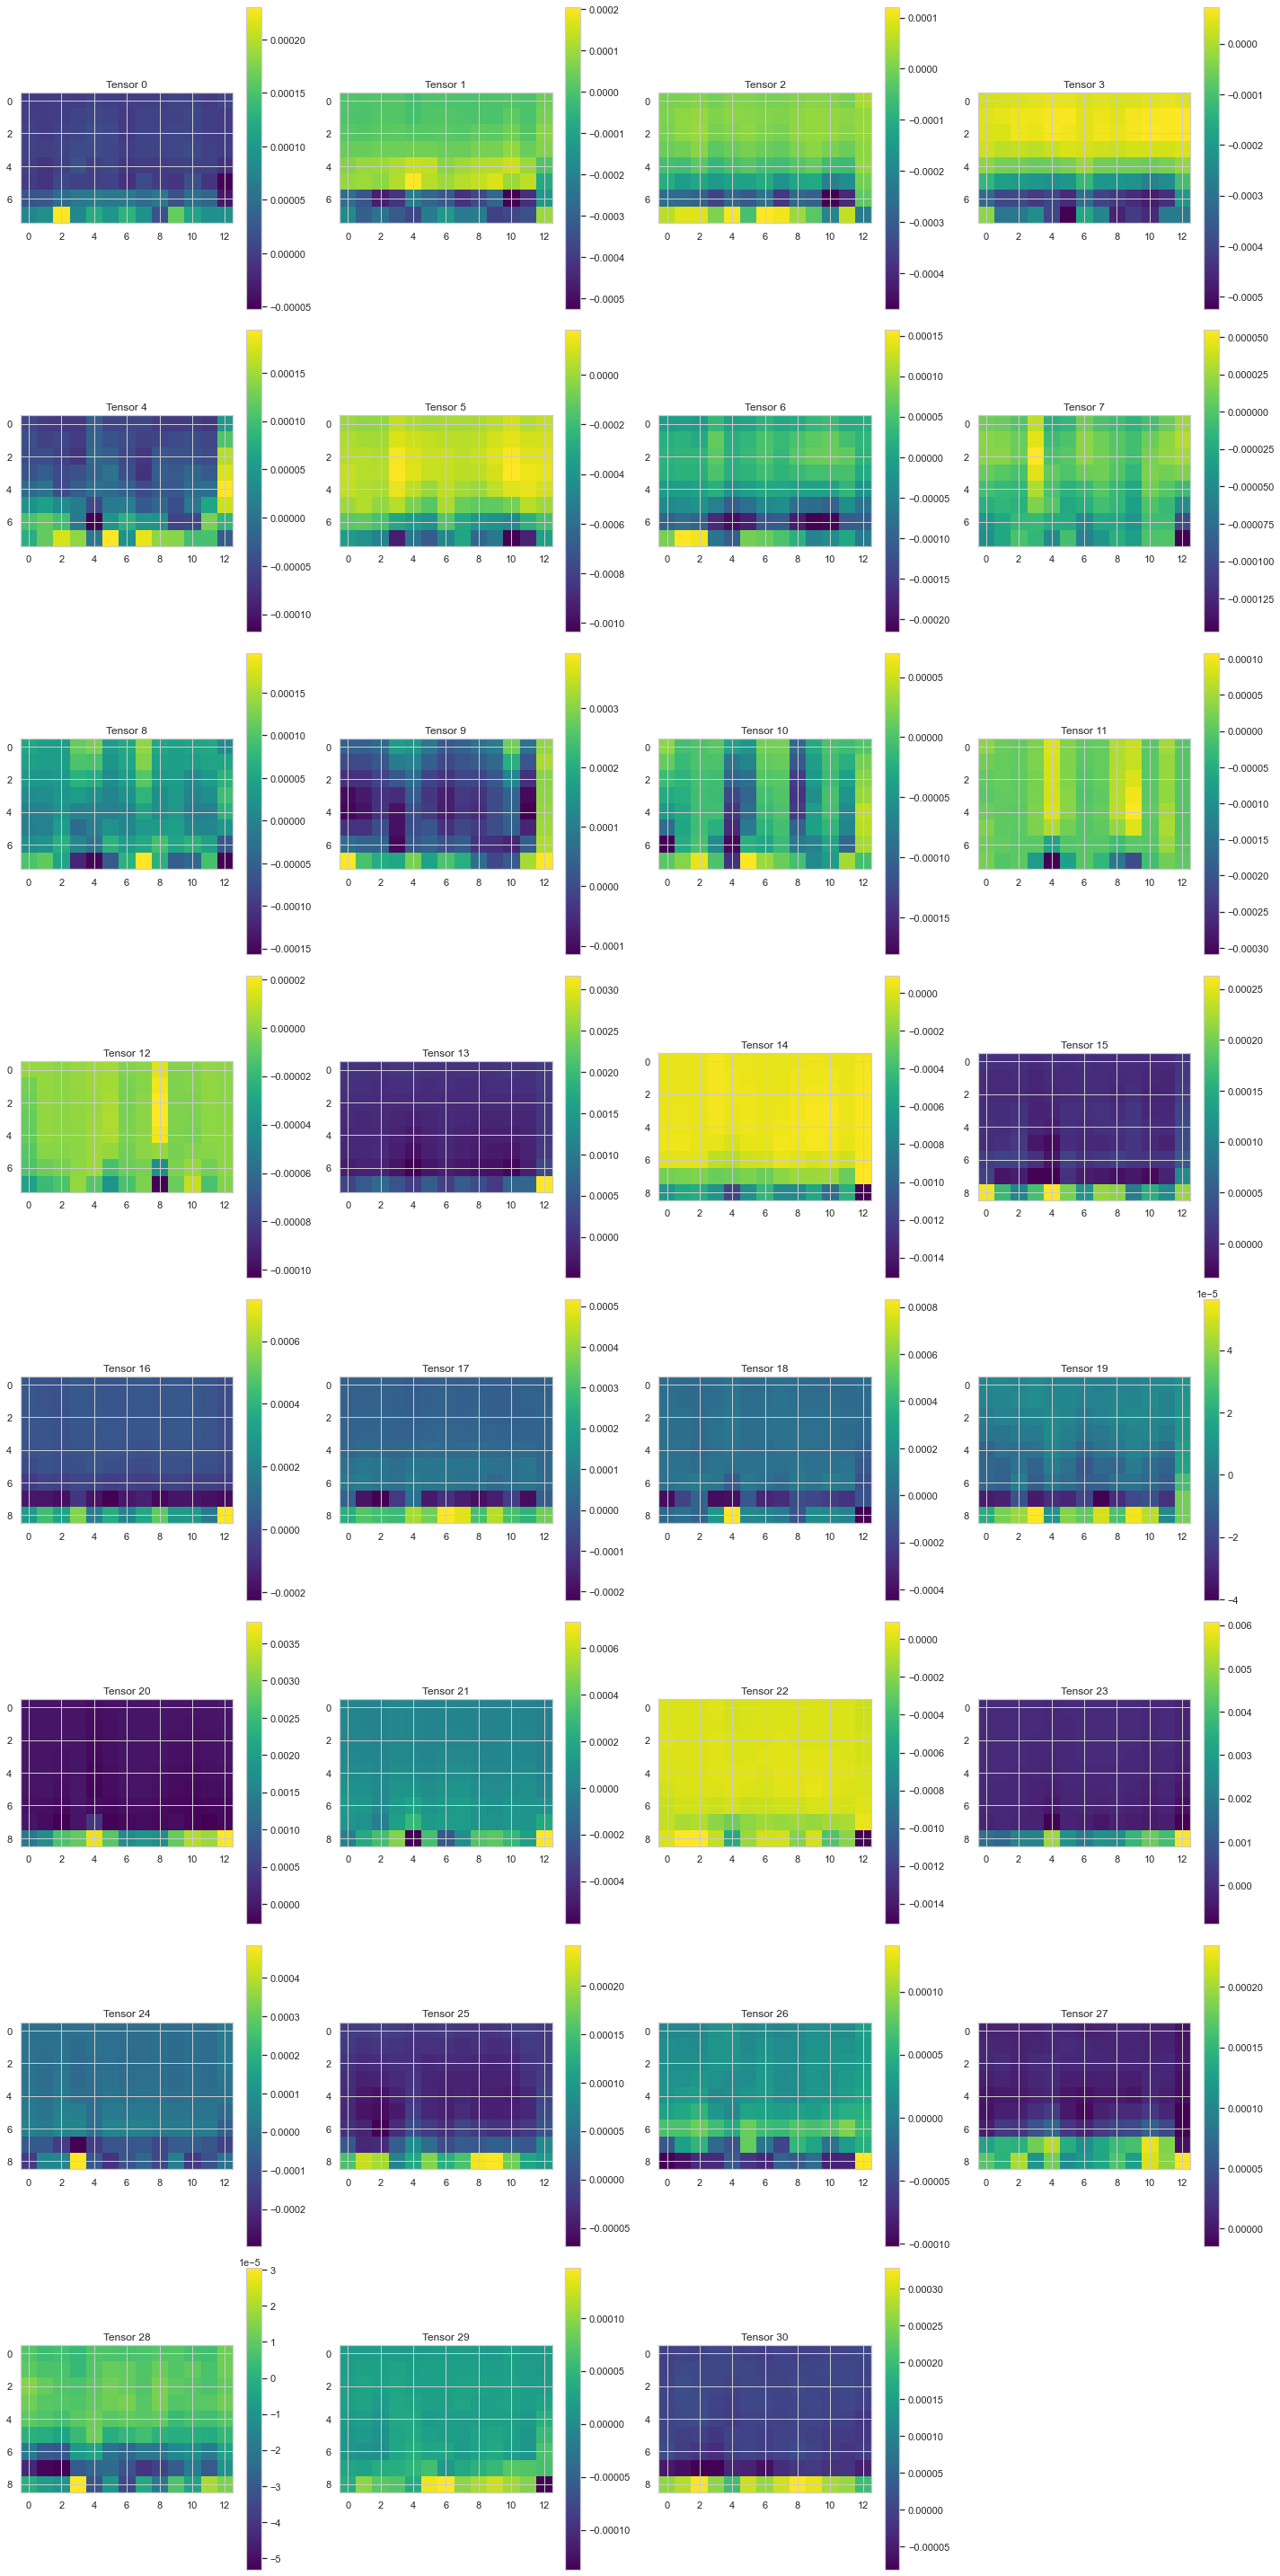

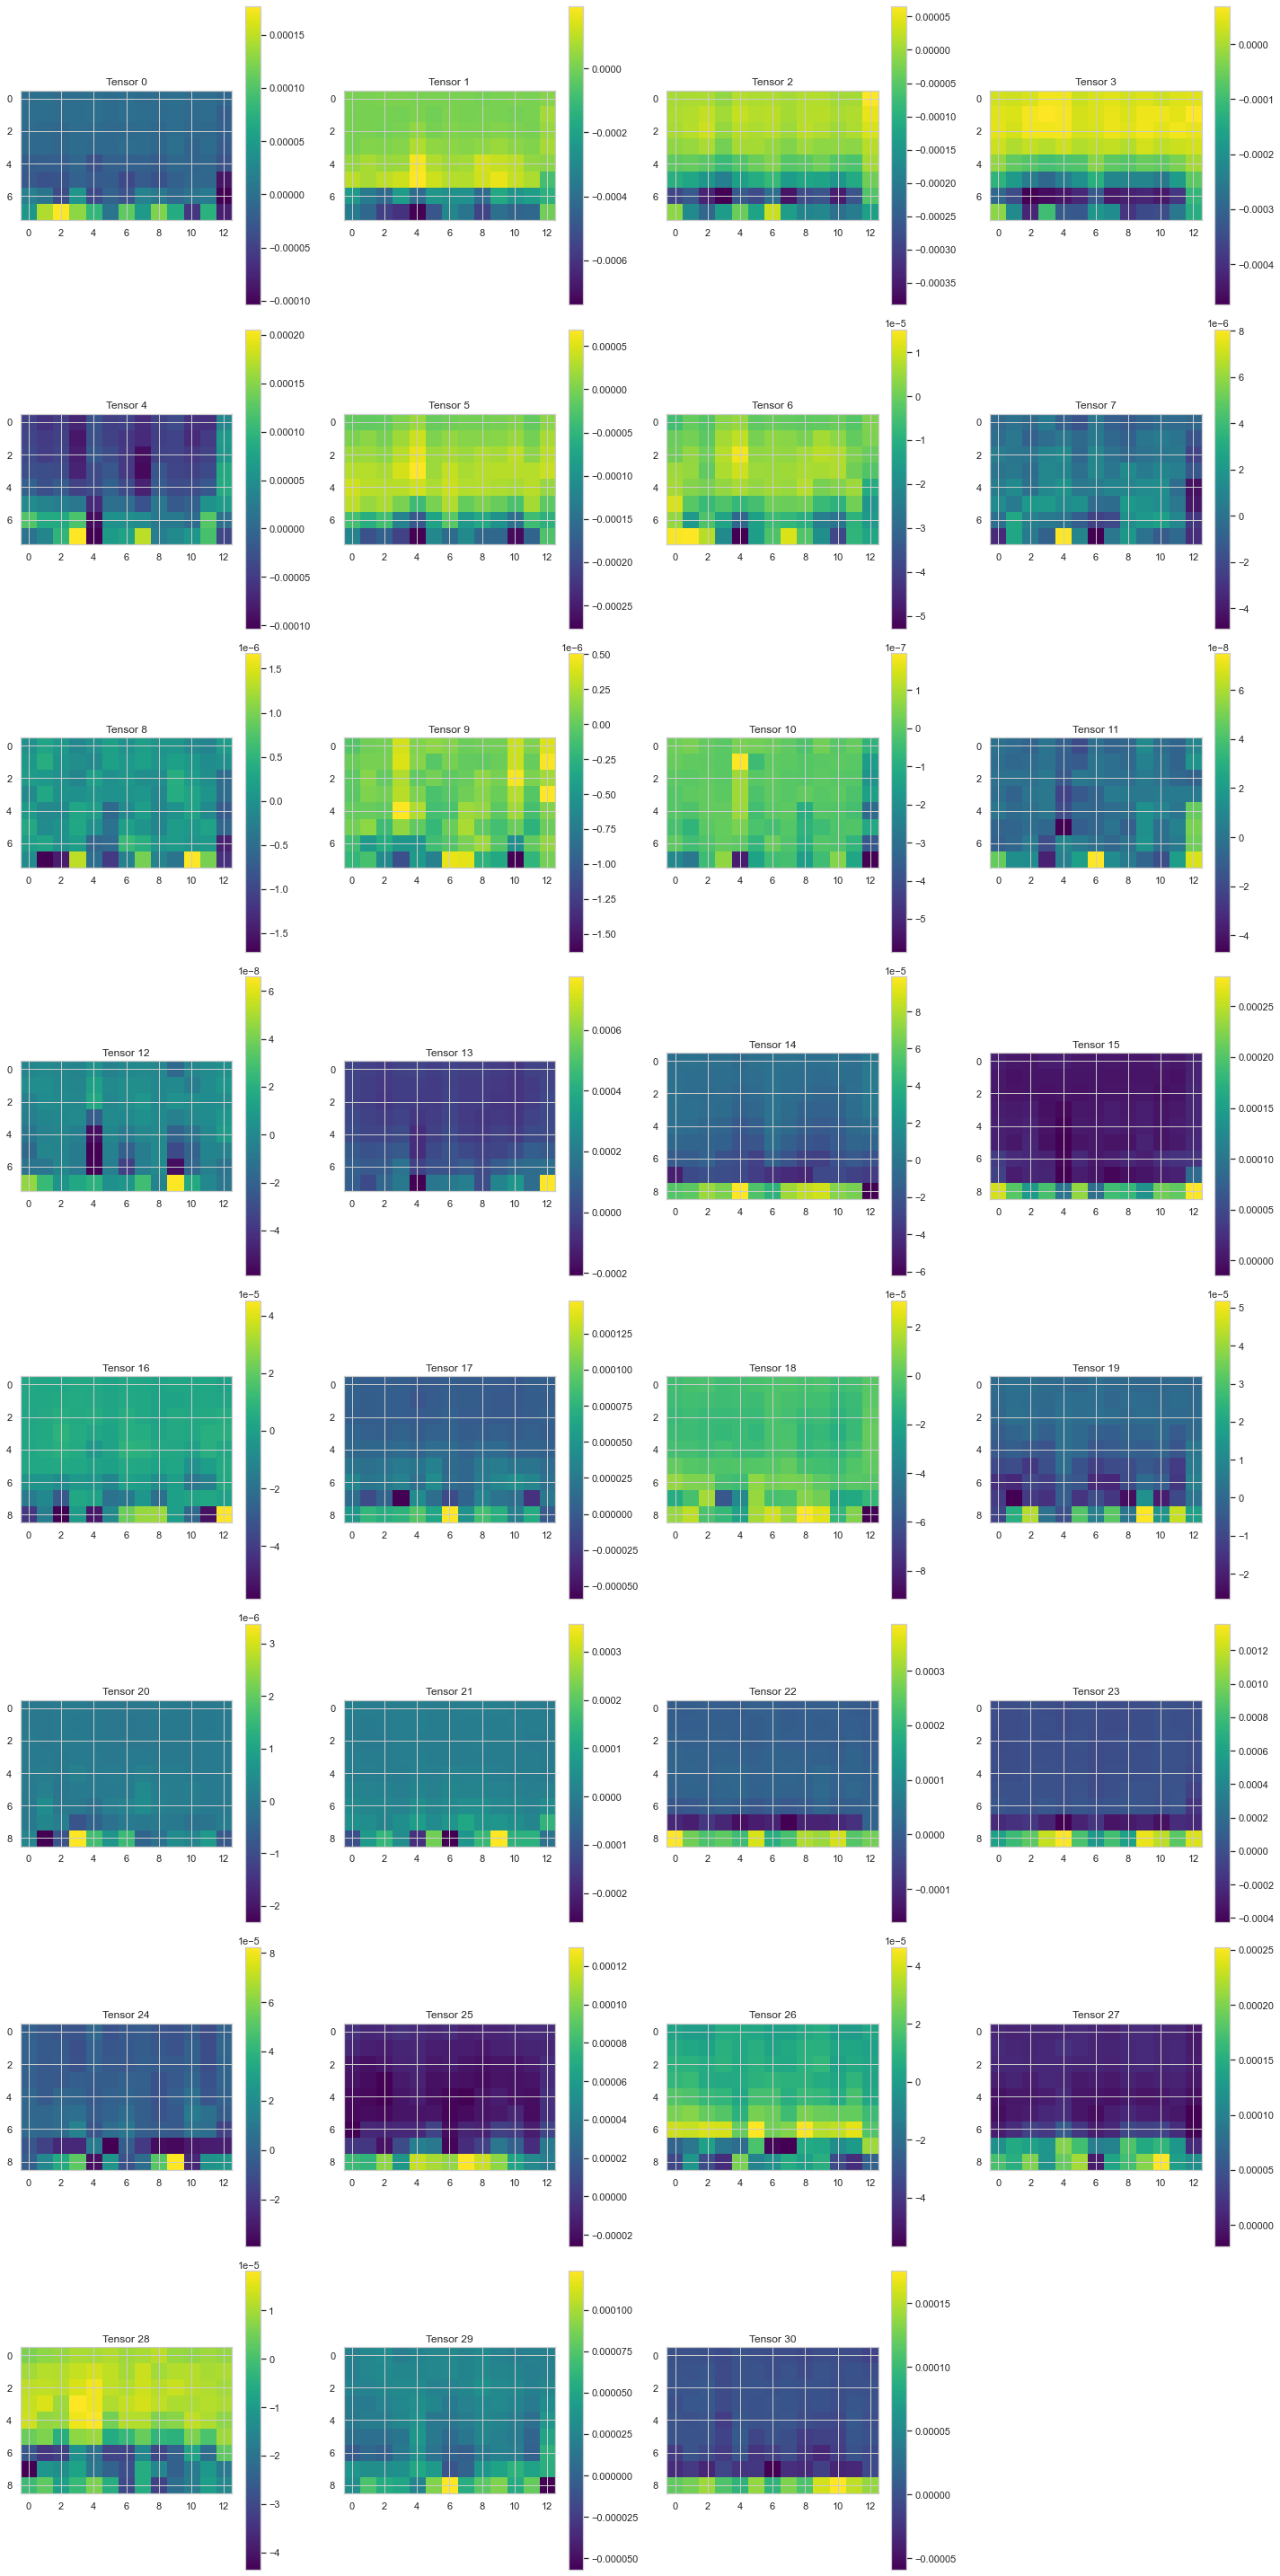

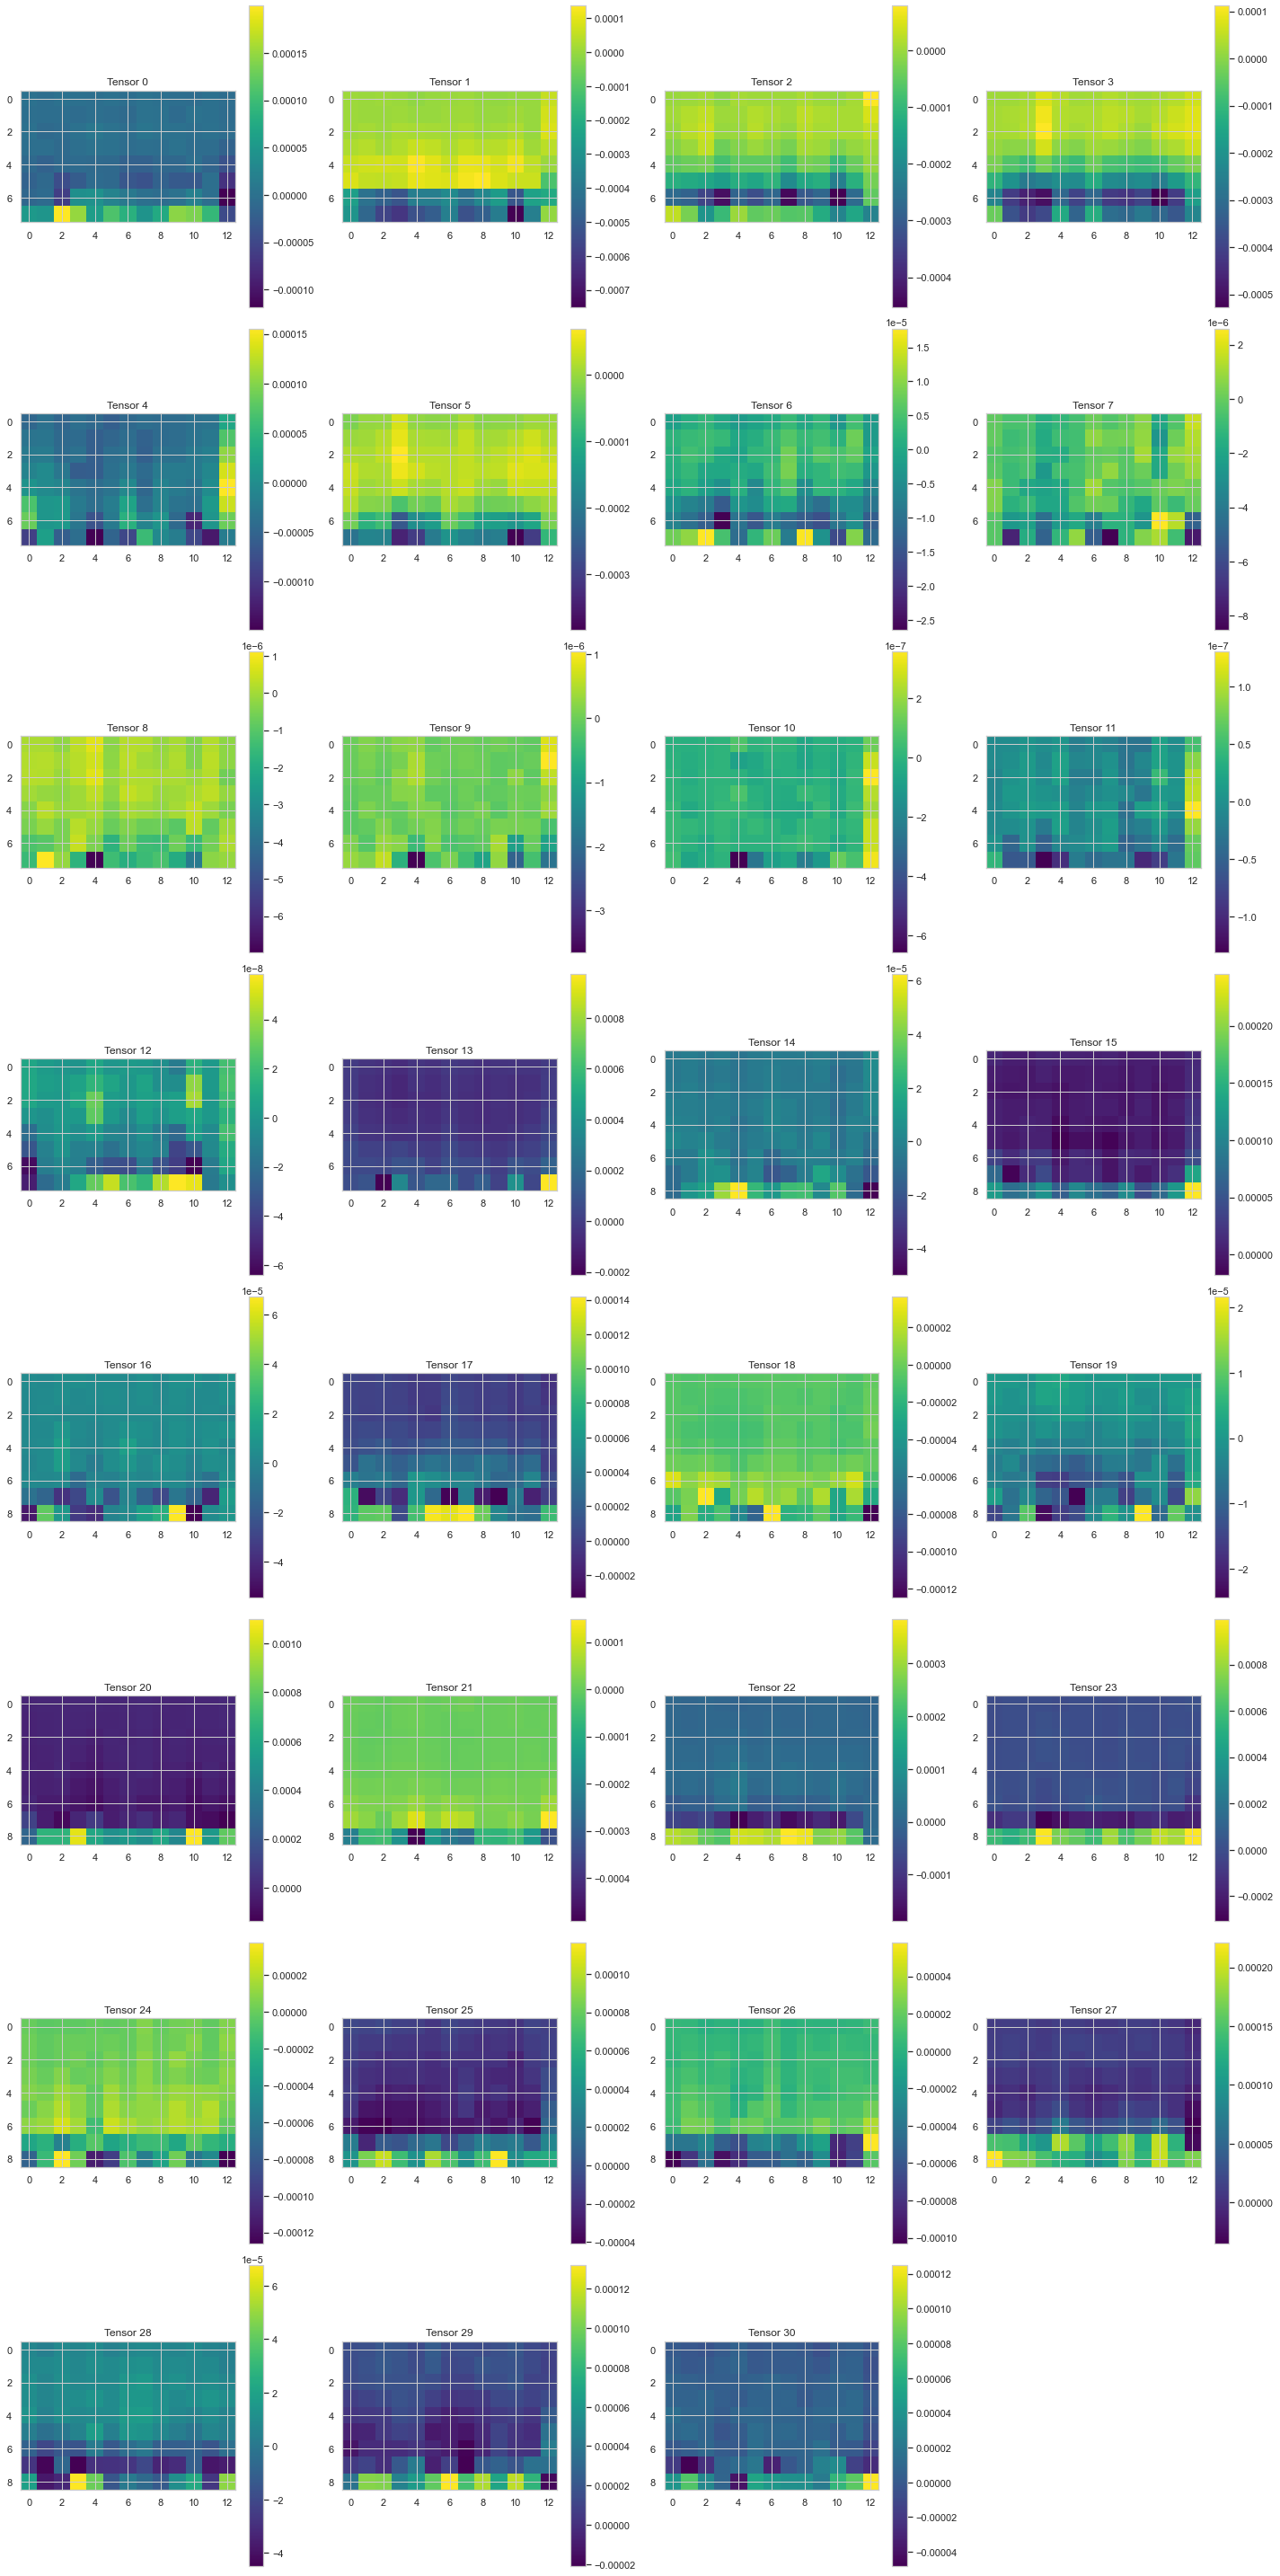

In [72]:
draw_alltensor(data_train)


draw_alltensor(data_test)



draw_alltensor(data_val)



C:\Users\rky\AppData\Local\Temp\ipykernel_33660\3871278519.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im)


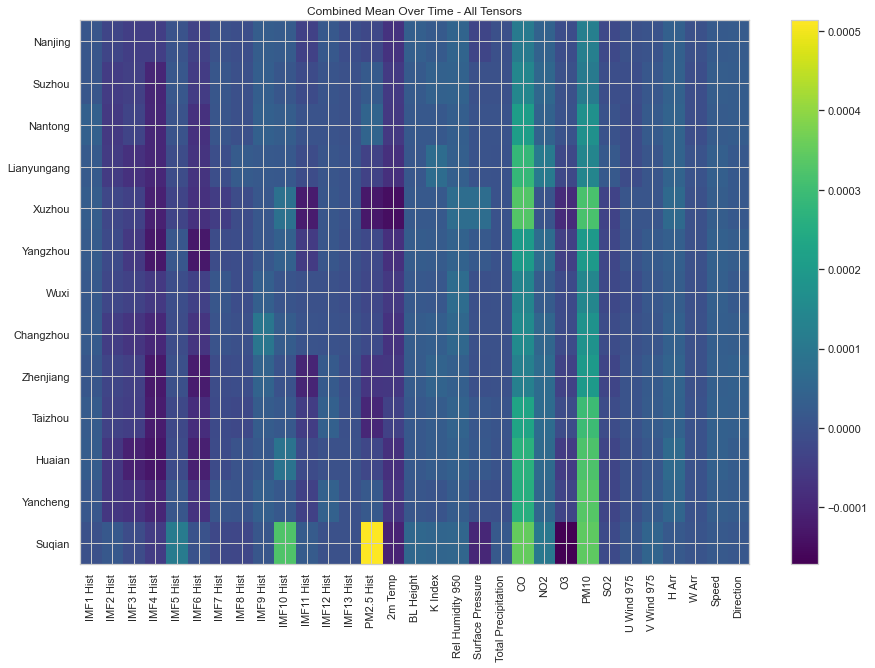

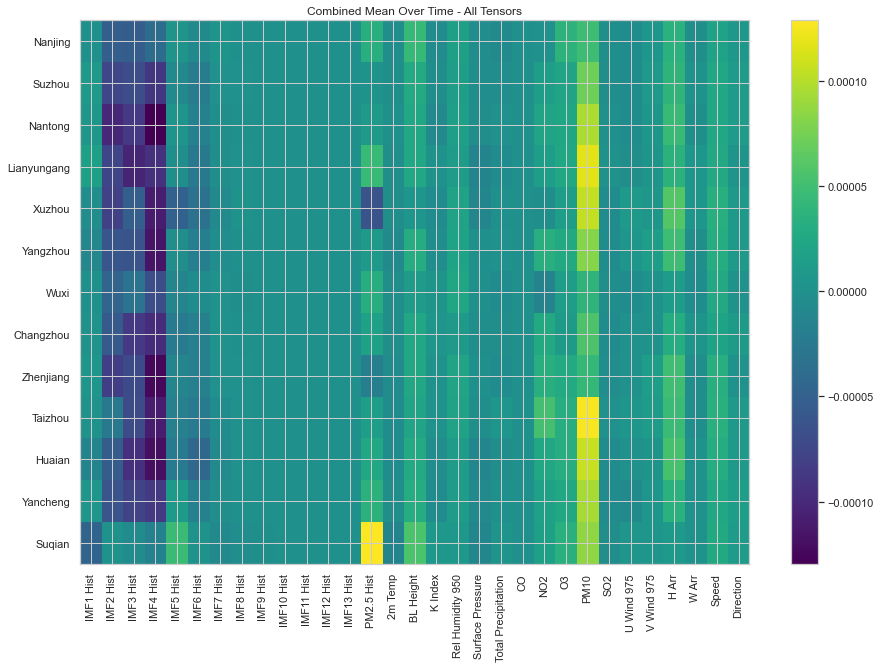

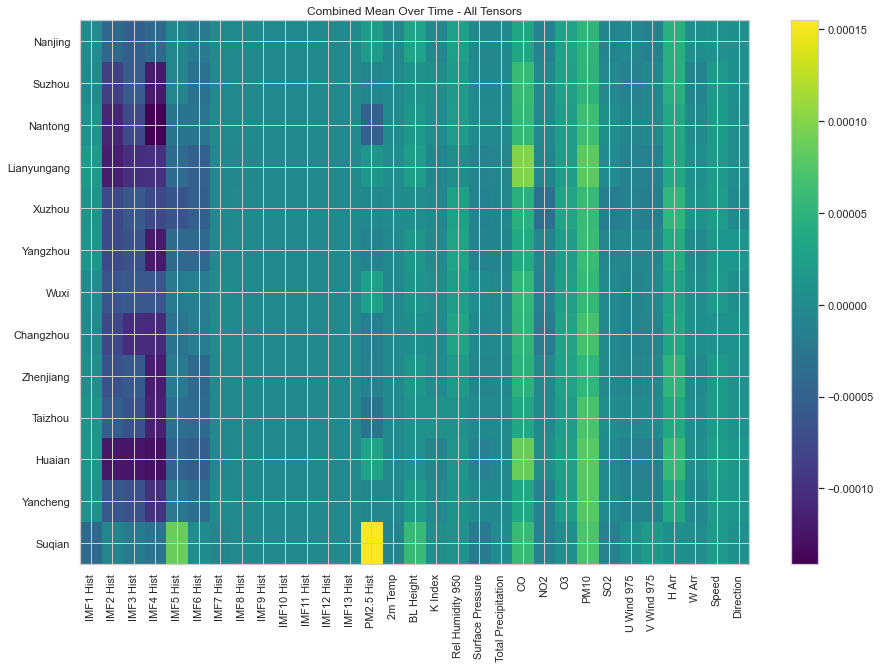

In [73]:
draw_ct(ct_train)
draw_ct(ct_test)
draw_ct(ct_val)

c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

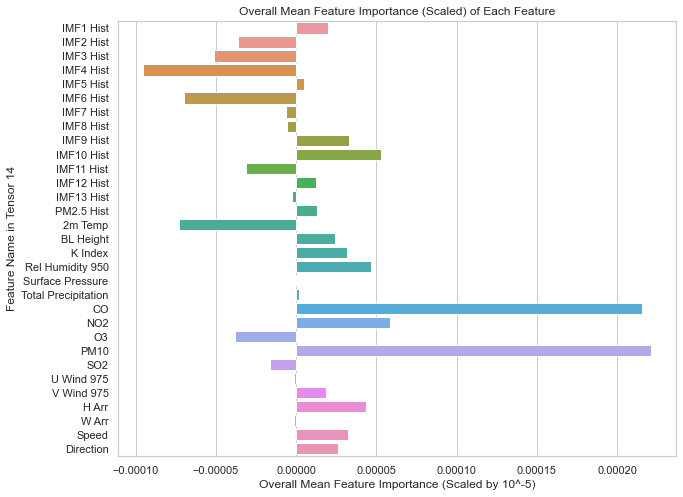

c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

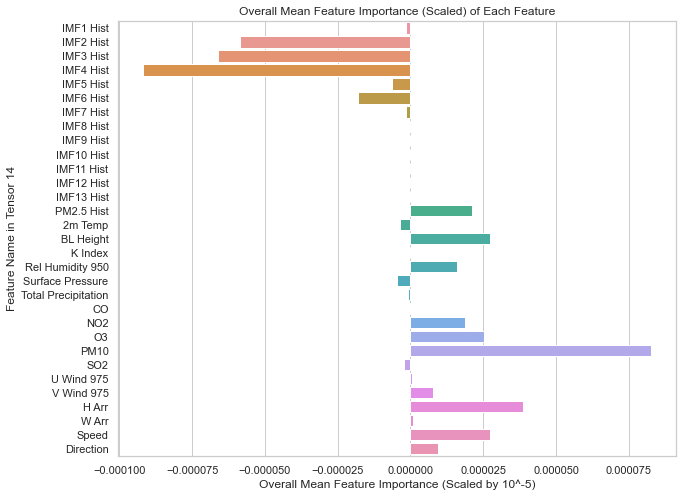

c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

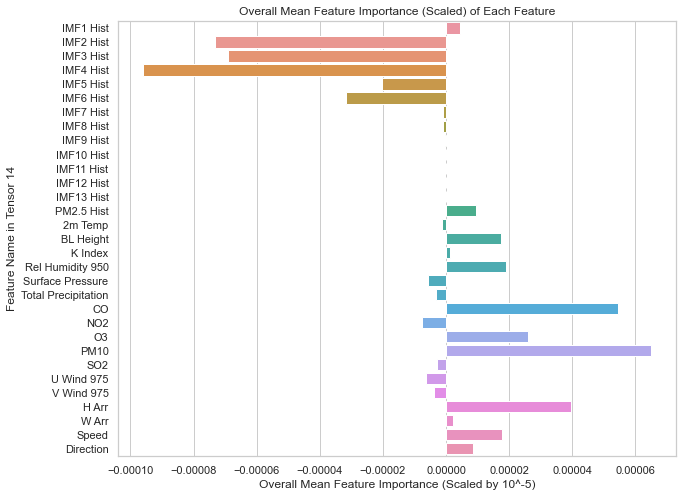

In [74]:

draw_fea(ctc_train)
draw_fea(ctc_test)
draw_fea(ctc_val)

In [80]:

# Check the result for the first tensor
keys = list(data_train.keys())

# Initialize a dictionary to hold the combined mean values
combined_mean_tensors = {}

# Calculate the weighted mean for each tensor across the train, val, and test datasets
# Since train has 182 elements and val/test have 90, we use these as weights
for key in keys:
    train_tensor = data_train[key] * 182
    val_tensor = data_val[key] * 90
    test_tensor = data_test[key] * 90
    combined_mean = (train_tensor + val_tensor + test_tensor) / (182 + 90 + 90)
    combined_mean_tensors[key] = combined_mean

# Save the combined means to a new npz file
combined_mean_file_path = 'all_data_mean.npz'
np.savez(combined_mean_file_path, **combined_mean_tensors)



In [81]:
# 加载保存的 .npz 文件
file_path_all = 'all_data_mean.npz'
data_all = np.load(file_path_all)
ct_all=cal_ct(data_all)
ctc_all=cal_ctc(ct_all)

c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

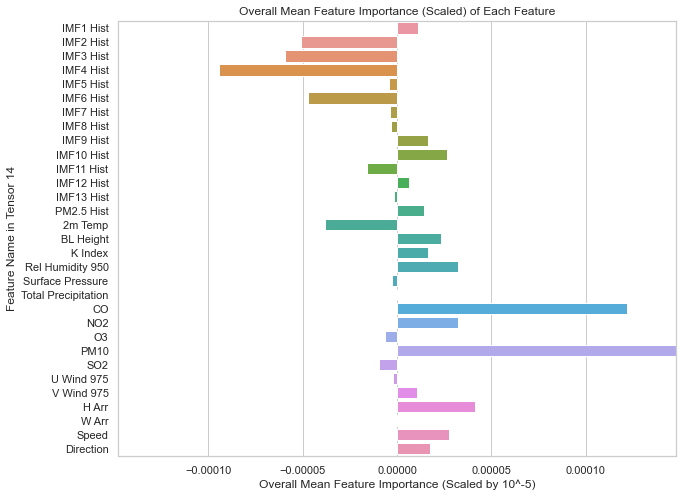

In [91]:
draw_fea(ctc_all)

[ 1.08306949e-05 -5.09213023e-05 -5.94928206e-05 -9.44430503e-05
 -4.22897392e-06 -4.74414519e-05 -3.82191092e-06 -3.11938697e-06
  1.64663961e-05  2.66871157e-05 -1.57695686e-05  6.37209223e-06
 -1.38522705e-06  1.42859490e-05 -3.79978846e-05  2.33059782e-05
  1.62006654e-05  3.22442393e-05 -2.67572841e-06 -1.82822433e-07
  1.21808735e-04  3.22531450e-05 -6.40025974e-06  1.47766477e-04
 -9.43564919e-06 -2.19697858e-06  1.02924932e-05  4.14221977e-05
  2.73971295e-07  2.73998594e-05  1.75593905e-05]


c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


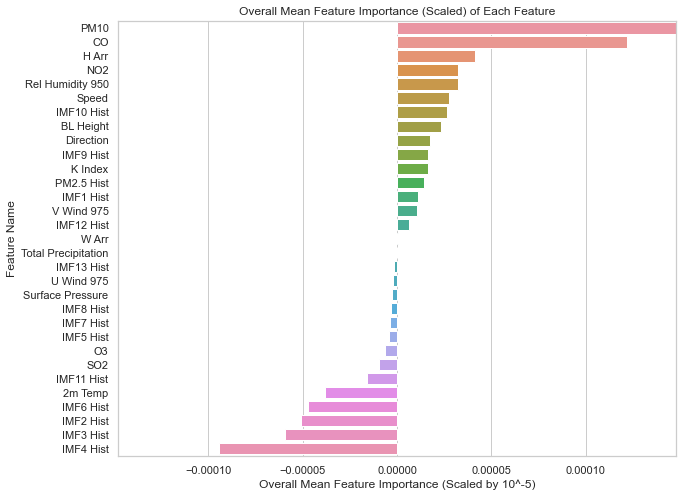

In [96]:
print(ctc_all)
draw_fea_sorted(ctc_all)

C:\Users\rky\AppData\Local\Temp\ipykernel_33660\183365524.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(im, ax=ax)


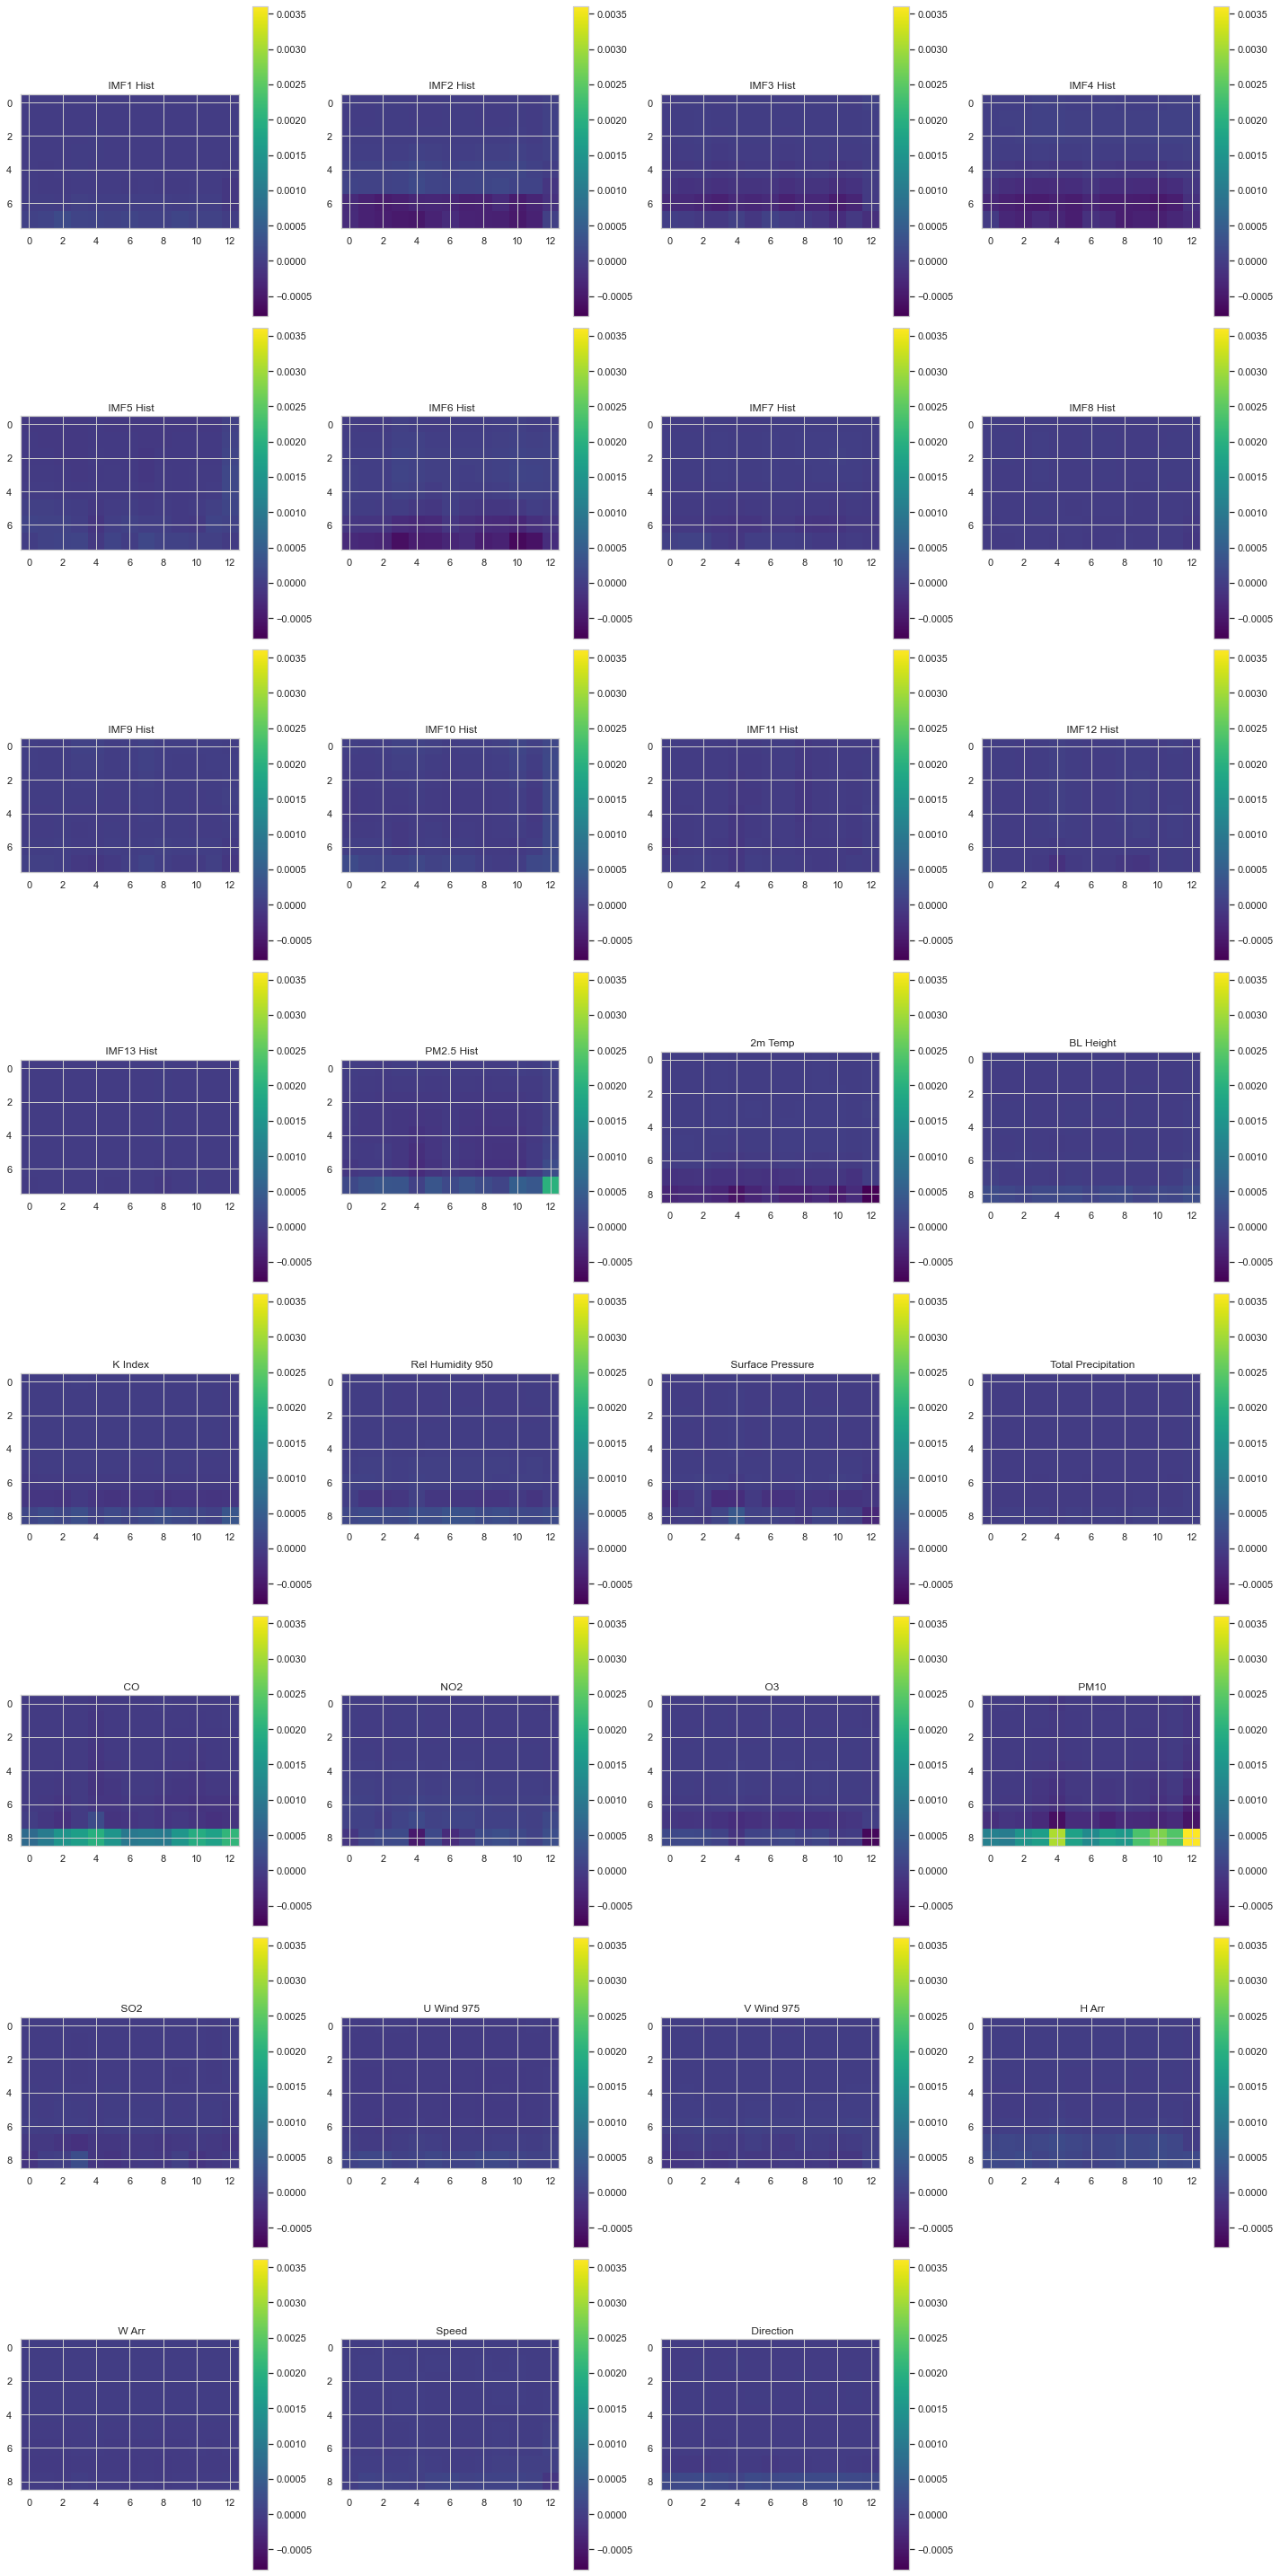

In [89]:
draw_alltensor(data_all)

C:\Users\rky\AppData\Local\Temp\ipykernel_33660\3871278519.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im)


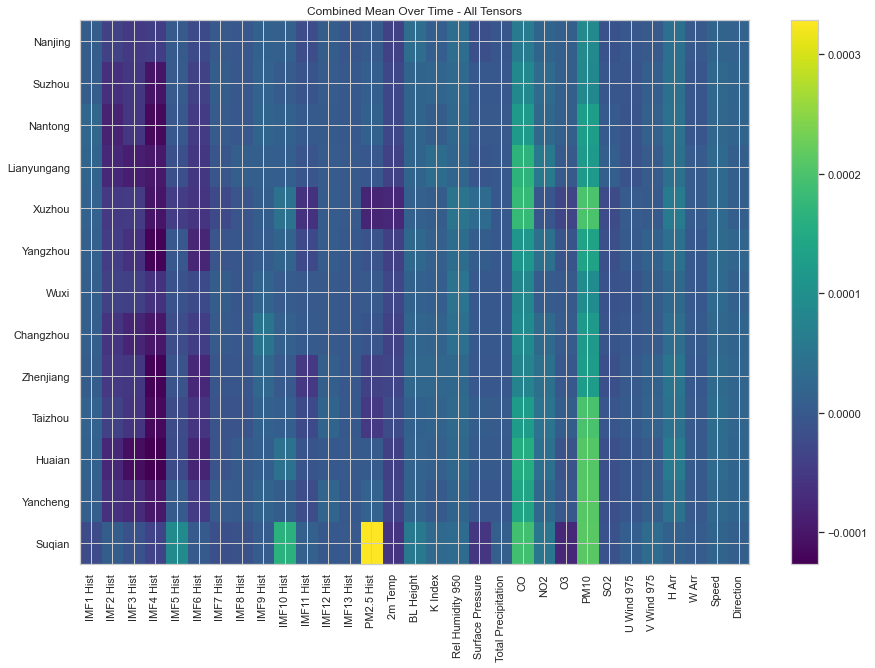

In [87]:
draw_ct(ct_all)